In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_th = pd.read_csv('BD_platelets_regular.csv', sep=';')
df_th

,r,eps,n,beta,0,0.5,1,1.5,2,2.5,...,85.5,86,86.5,87,87.5,88,88.5,89,89.5,90
0,0.5,0.1,1.3725,40,25.301178,25.209944,24.938040,24.490799,23.876934,23.108286,...,0.035687,0.040932,0.046830,0.053408,0.060684,0.068672,0.077375,0.086786,0.096886,0.107647
1,0.5,0.1,1.3725,42,25.253750,25.164614,24.898931,24.461840,23.861731,23.110008,...,0.110150,0.120814,0.131986,0.143610,0.155616,0.167922,0.180437,0.193053,0.205656,0.218120
2,0.5,0.1,1.3725,44,25.202293,25.115267,24.855852,24.428991,23.842764,23.108150,...,0.219127,0.230691,0.241920,0.252689,0.262871,0.272336,0.280954,0.288599,0.295148,0.300487
3,0.5,0.1,1.3725,46,25.143423,25.058531,24.805452,24.388945,23.816780,23.099533,...,0.305602,0.309963,0.313069,0.314847,0.315234,0.314183,0.311665,0.307667,0.302198,0.295287
4,0.5,0.1,1.3725,48,25.076042,24.993305,24.746632,24.340595,23.782681,23.083057,...,0.312300,0.304946,0.296285,0.286385,0.275334,0.263235,0.250206,0.236381,0.221905,0.206933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196139,2.1,1.0,1.3875,82,214711.812500,212251.640600,205016.031300,193427.546900,178150.890600,160037.921900,...,1.374523,1.331677,1.215894,1.043869,0.838637,0.626118,0.431531,0.276193,0.175054,0.135262
196140,2.1,1.0,1.3875,84,214710.484400,212250.328100,205014.765600,193426.375000,178149.843800,160037.015600,...,1.377804,1.336296,1.221435,1.049784,0.844330,0.631035,0.435245,0.278462,0.175858,0.134800
196141,2.1,1.0,1.3875,86,214710.375000,212250.218800,205014.671900,193426.281300,178149.765600,160036.968800,...,1.384726,1.344976,1.231294,1.060079,0.854240,0.639758,0.442089,0.282927,0.177689,0.134010
196142,2.1,1.0,1.3875,88,214711.218800,212251.046900,205015.484400,193427.046900,178150.500000,160037.640600,...,1.388198,1.349743,1.237083,1.066495,0.860799,0.645923,0.447320,0.286726,0.179647,0.133848


In [3]:
columns_to_remove = [column for column in df_th.columns if re.search(r'\.', column)]
df_th = df_th.drop(columns_to_remove, axis=1)

In [4]:
columns_to_keep = ['r', 'eps', 'n', 'beta'] + [str(column) for column in range(10, 70)]
df_th = df_th[columns_to_keep]

In [5]:
X = df_th.iloc[:, 4:]
y = df_th[['r', 'eps', 'n', 'beta']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
Xvse_scaled = scaler_X.fit_transform(X)

# # Создание экземпляра MinMaxScaler для нормализации y
scaler_y = MinMaxScaler()
y_scaled= scaler_y.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(Xvse_scaled, y_scaled, test_size=0.02, shuffle=True)
print(f"X_train: {X_train.shape} \ny_train: {y_train.shape} \nX_val: {X_val.shape}, \ny_val: {y_val.shape}")

X_train: (192221, 60) 
y_train: (192221, 4) 
X_val: (3923, 60), 
y_val: (3923, 4)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(Xvse_scaled , y_scaled, test_size=0.02, shuffle=True)

In [9]:
import matplotlib.pyplot as plt

In [11]:
from skopt import BayesSearchCV

In [13]:
!pip install catboost

In [10]:
from catboost import CatBoostRegressor
import itertools

In [16]:
param_grid = {
    'learning_rate': list(np.arange(0.001, 0.35, 0.05)),
    'depth': list(range(1, 17)),
    'l2_leaf_reg': [10],
    'iterations': [100, 200, 400, 800],
    'border_count': [50, 150, 250, 300],
    'bagging_temperature': [4],
    'random_strength': [4]}

cat = CatBoostRegressor(loss_function="MultiRMSE")

gs = BayesSearchCV(cat, param_grid, n_jobs=-1, scoring='r2', verbose=5)
gs.fit(X_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


CatBoostError: bad allocation

0:	learn: 0.6272236	total: 304ms	remaining: 5m 3s
200:	learn: 0.3802468	total: 26.7s	remaining: 1m 45s
400:	learn: 0.3517010	total: 53.6s	remaining: 1m 20s
600:	learn: 0.3317512	total: 1m 23s	remaining: 55.3s
800:	learn: 0.3162941	total: 2m 4s	remaining: 31s
999:	learn: 0.3041586	total: 2m 47s	remaining: 0us


NameError: name 'mean_absolute_error' is not defined

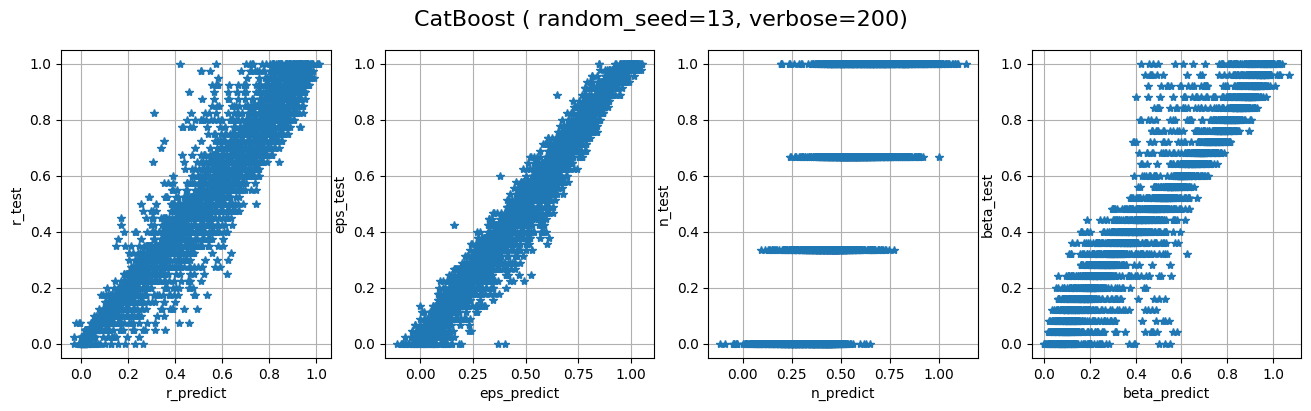

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

def model_score(model, _x_train, _y_train, _x_test, _y_test):
    l = ['r', 'eps', 'n', 'beta']
    plt.figure(figsize=(16, 4))
    model.fit(_x_train, _y_train)
    _y_predict = model.predict(_x_test)
    m = len(np.array(_y_test)[0])
    
    plt.suptitle(f"CatBoost ( random_seed={13}, verbose={200})", fontsize=16)
    
    for i in range(m):
        plt.subplot(1, 4, i+1)
        plt.xlabel(l[i] + '_predict')
        plt.ylabel(l[i] + '_test')
        plt.plot(_y_predict[:, i], np.array(_y_test)[:, i], '*')
        plt.grid(True)
        
   # mae = mean_absolute_error(np.array(_y_test), _y_predict, multioutput='raw_values')
    #print(mae)
        
       # plt.title(f"mae score: {mae:.2f}")
    r2 = r2_score(np.array(_y_test), _y_predict, multioutput='raw_values')
    print(r2)
    
    plt.tight_layout()
    plt.show()

learning_rate_values = np.arange(0.001, 0.35, 0.05)
depth_values = [2,4, 8,16]
l2_leaf_reg_values=[2,4, 8,16]

#for learning_rate in learning_rate_values:
   # for depth in depth_values:
     #   for l2_leaf_reg in l2_leaf_reg_values:
            
cb_reg_1 = CatBoostRegressor(loss_function="MultiRMSE", random_seed=13, verbose=200 )
model_score(cb_reg_1, X_train, y_train, X_test, y_test)

In [21]:
!pip install hyperopt

     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
      --------------------------------------- 0.0/1.6 MB 640.0 kB/s eta 0:00:03
      --------------------------------------- 0.0/1.6 MB 640.0 kB/s eta 0:00:03
      --------------------------------------- 0.0/1.6 MB 640.0 kB/s eta 0:00:03
     - -------------------------------------- 0.1/1.6 MB 357.2 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.6 MB 435.7 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.6 MB 450.6 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/1.6 MB 482.7 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.6 MB 540.4 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.6 MB 533.8 kB/s eta 0:00:03
     ------ --------------------------------- 0.3/1.6 MB 567.7 kB/s eta 0:00:03
     ------ --------------------------------- 0.3/1.6 MB 567.7 kB/s eta 0:00:03
     ------ --------------------------------- 0.3

In [38]:
cb_reg_1.fit(X_train, y_train)
cb_preds = cb_reg_1.predict(X_val)

0:	learn: 0.6272723	total: 242ms	remaining: 4m 1s
200:	learn: 0.3797084	total: 35.2s	remaining: 2m 19s
400:	learn: 0.3519828	total: 1m 12s	remaining: 1m 49s
600:	learn: 0.3314631	total: 1m 54s	remaining: 1m 15s
800:	learn: 0.3161533	total: 2m 30s	remaining: 37.4s
999:	learn: 0.3041287	total: 3m 4s	remaining: 0us


In [11]:
from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

In [12]:
catboost_hyperparams = { 'learning_rate': hp.choice('learning_rate', np.arange(0.05, 0.31, 0.05)),
                         'max_depth': hp.choice('max_depth', np.arange(5, 16, 1, dtype=int)),
                         'colsample_bylevel': hp.choice('colsample_bylevel', np.arange(0.3, 0.8, 0.1)),
                         'n_estimators': 100, 'eval_metric': 'MultiRMSE'}

catbooast_fit_params = { 'early_stopping_rounds': 10, 'verbose': False }

catboost_params = dict()
catboost_params['reg_params'] = catboost_hyperparams
catboost_params['fit_params'] = catbooast_fit_params


In [13]:
class HPOptimiser(object):
    """ Class to optimiser hyper-parameters using hyperopt on a given
        set of training and validation inputs and labels """

    def __init__(self, X_train, X_val, y_train, y_val):
        self.X_train = X_train
        self.X_val  = X_val
        self.y_train = y_train
        self.y_val  = y_val

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def catboost_reg(self, para):
        reg = CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, params):
        reg.fit(self.X_train, self.y_train,
                eval_set=[(self.X_train, self.y_train), (self.X_val, self.y_val)],
                **params['fit_params'])
        pred = reg.predict(self.X_val)
        loss = params['loss_func'](self.y_val, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [22]:
cb_learn_rate = 0.06
n_iterations = 35000
early_stop_rounds = 400

opt_catboost_params = {'iterations' : n_iterations,
                       'learning_rate' : cb_learn_rate,
                       'depth': 7,
                       'bootstrap_type' : 'Bernoulli',
                       'random_strength': 1,
                       'min_data_in_leaf': 10,
                       'l2_leaf_reg': 3,
                       'loss_function' : 'MultiRMSE', 
                       'eval_metric' : 'MultiRMSE',
                       'grow_policy' : 'Depthwise',
                       'max_bin' : 1024, 
                       'model_size_reg' : 0,
                       'od_type' : 'IncToDec',
                       'od_wait' : 100,
                       'metric_period' : 500,
                       'verbose' : 500,
                       'subsample' : 0.8,
                       'od_pval' : 1e-10,
                       'max_ctr_complexity' : 8,
                       'has_time': False,
                       'random_seed' : 13}

In [30]:
!pip install shap

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\Пользователь\\pythonProject\\venv\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-gcc_10_3_0.dll'
Check the permissions.




  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/76/0f/a17e7f29c9bb859231a7098457b08ca99d16079b8d8c6c68d5be84800efb/shap-0.42.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/f3/3e/6349c624303b78b6bbb97168c7fb38a1a0cb1605ae4c5d45af3b829f067a/numba-0.57.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.41,>=0.40.0dev0 from https://files.pythonhosted.org/packages/6c/4f/e6f9dc0b34e5b8450ef757cd35afda999c8cc5098907a512cf0ecae840b5/llvmlite-0.40.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/22/55/3d5a7c1142e0d9329ad27cece17933b0e2ab4e54ddc5c1861fbfeb3f7693/numpy-1.24.4-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/462.3 kB ? eta -:--:--
   -- ------------------------------------- 30.7/462.3 kB 1.3 MB/s eta 0:00:01
   -- -

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


from catboost import CatBoostRegressor, cv, Pool

from collections import defaultdict

from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials


from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline


In [34]:
!pip install ipywidgets

  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/a3/af/9d5f256025100b578b11d7280e76fda349255666f752b618a613785cb58d/ipywidgets-8.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.7 from https://files.pythonhosted.org/packages/8e/d4/d31b12ac0b87e8cc9fdb6ea1eb6596de405eaaa2f25606aaa755d0eebbc0/widgetsnbextension-4.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.7 from https://files.pythonhosted.org/packages/74/5e/2475ac62faf2e342b2bf20b8d8e375f49400ecb38f52e4e0a7557eb1cedb/jupyterlab_widgets-3.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/138.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/138.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/138.3 kB ? eta -:--:--
   -------- ------------------------------ 30.7/138.3 kB 262.6 kB/s eta 0:00:01
   -------- ------------------------------ 3

In [23]:
cb_reg = CatBoostRegressor(**opt_catboost_params)

cb_reg.fit(X_train, y_train, eval_set=(X_val, y_val), 
           use_best_model=True, plot=True, 
           early_stopping_rounds=early_stop_rounds)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6306219	test: 0.6306155	best: 0.6306155 (0)	total: 85.8ms	remaining: 50m 4s
500:	learn: 0.2131124	test: 0.2287285	best: 0.2287285 (500)	total: 4m 6s	remaining: 4h 43m 10s
1000:	learn: 0.1693955	test: 0.1978514	best: 0.1978514 (1000)	total: 8m 33s	remaining: 4h 50m 40s
1500:	learn: 0.1420988	test: 0.1812982	best: 0.1812982 (1500)	total: 12m 43s	remaining: 4h 43m 58s
2000:	learn: 0.1217806	test: 0.1708058	best: 0.1708058 (2000)	total: 16m 59s	remaining: 4h 40m 7s
2500:	learn: 0.1055391	test: 0.1627085	best: 0.1627085 (2500)	total: 21m 3s	remaining: 4h 33m 43s
3000:	learn: 0.0927887	test: 0.1567537	best: 0.1567537 (3000)	total: 25m 5s	remaining: 4h 27m 30s
3500:	learn: 0.0826915	test: 0.1524253	best: 0.1524253 (3500)	total: 29m 9s	remaining: 4h 22m 21s
4000:	learn: 0.0743438	test: 0.1489383	best: 0.1489383 (4000)	total: 33m 10s	remaining: 4h 17m
4500:	learn: 0.0672117	test: 0.1459803	best: 0.1459803 (4500)	total: 37m 11s	remaining: 4h 11m 59s
5000:	learn: 0.0614611	test: 0.143

In [24]:
pred = cb_reg.predict(X_val)

In [25]:
pred

array([[ 0.93935803,  0.83677043,  0.66645302,  0.65506993],
       [ 0.90294945,  0.67015576,  0.61889377,  0.2014508 ],
       [ 0.30405477,  0.52616601,  0.73816613,  0.64324488],
       ...,
       [-0.00134481,  0.57203764,  0.68008638,  0.45374146],
       [ 0.72003079,  0.95259162,  1.00839927,  0.70521478],
       [ 0.91459841,  0.0487403 ,  0.61358352,  0.51899107]])

In [26]:
cb_reg.best_params_, gs.best_score_

AttributeError: 'CatBoostRegressor' object has no attribute 'best_params_'

In [91]:
import json
import gzip

def compress_data(data):
    # Convert to JSON
    json_data = json.dumps(data, indent=2)
    # Convert to bytes
    encoded = json_data.encode('utf-8')
    # Compress
    compressed = gzip.compress(encoded)
    with open('compressed_data.gz', 'wb') as file:
        file.write(compressed)

In [84]:
cb_reg.save_model('catboost_model.json'  )
cb_reg.save_model('catboost_model.bin', format="cbm"

In [87]:
cb_reg.save_model("compressed_model.cbm", format="cbm", compress_type="gzip")

TypeError: CatBoost.save_model() got an unexpected keyword argument 'compress_type'

In [92]:
compress_data('catboost_model.json')

In [31]:
cat_b = cb_reg.load_model('catboost_model.bin')

print(cb_reg.get_params())
print(cb_reg.random_seed_)

{'model_size_reg': 0, 'verbose': 500, 'bootstrap_type': 'Bernoulli', 'has_time': False, 'od_type': 'Iter', 'use_best_model': True, 'random_seed': 13, 'grow_policy': 'Depthwise', 'border_count': 1024, 'min_data_in_leaf': 10, 'random_strength': 1, 'learning_rate': 0.06, 'max_ctr_complexity': 8, 'iterations': 35000, 'l2_leaf_reg': 3, 'od_wait': 400, 'depth': 7, 'subsample': 0.8, 'eval_metric': 'MultiRMSE', 'metric_period': 500, 'loss_function': 'MultiRMSE'}
13


In [51]:
cat_b1=CatBoostRegressor().load_model('catboost_model.bin')

In [58]:
preds = cat_b1.predict(X_val)

[0.99945171 0.99929545 0.998281   0.99905159]


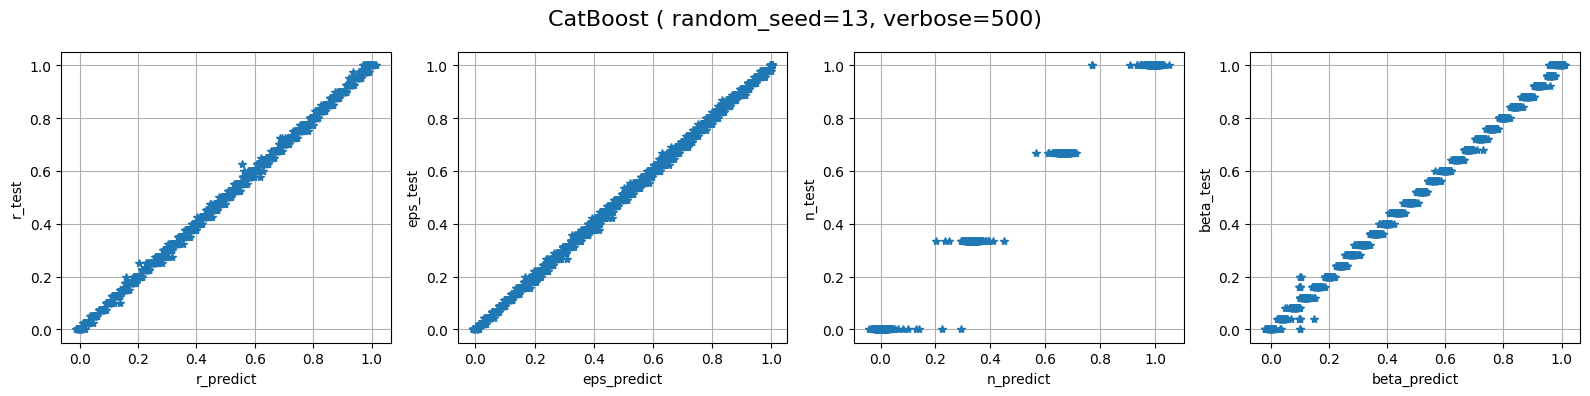

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

def model_score(model, _x_train, _y_train, _x_test,  _y_test):
    l = ['r', 'eps', 'n', 'beta']
    plt.figure(figsize=(16, 4))
    #model.fit(_x_train, _y_train)
    _y_predict = model.predict(_x_test)
    m = len(np.array(_y_test)[0])
    
    plt.suptitle(f"CatBoost ( random_seed={13}, verbose={500})", fontsize=16)
    
    for i in range(m):
        plt.subplot(1, 4, i+1)
        plt.xlabel(l[i] + '_predict')
        plt.ylabel(l[i] + '_test')
        plt.plot(_y_predict[:, i], np.array(_y_test)[:, i], '*')
        plt.grid(True)
        
   # mae = mean_absolute_error(np.array(_y_test), _y_predict, multioutput='raw_values')
    #print(mae)
        
       # plt.title(f"mae score: {mae:.2f}")
    r2 = r2_score(np.array(_y_test), _y_predict, multioutput='raw_values')
    print(r2)
    
    plt.tight_layout()
    plt.show()

learning_rate_values = np.arange(0.001, 0.35, 0.05)
depth_values = [2,4, 8,16]
l2_leaf_reg_values=[2,4, 8,16]

#for learning_rate in learning_rate_values:
   # for depth in depth_values:
     #   for l2_leaf_reg in l2_leaf_reg_values:
            
#cb_reg_1 = CatBoostRegressor(model_size_reg = 0, verbose = 500, bootstrap_type = 'Bernoulli', has_time = False, od_type = 'Iter', random_seed =  13, grow_policy = 'Depthwise', border_count = 1024, min_data_in_leaf =  10, random_strength =  1, learning_rate = 0.06, max_ctr_complexity = 8, iterations = 35000, l2_leaf_reg = 3, od_wait = 400, depth = 7, subsample = 0.8, eval_metric = 'MultiRMSE', metric_period = 500, loss_function = 'MultiRMSE' )
model_score(cat_b, X_train, y_train, X_test, y_test)

In [53]:
train_preds = cb_reg.predict(X_train)

residual_plot(y_train[:10000], train_preds[:10000], 
              y_val[:10000], val_preds[:10000], 
              title="CatBoost Residual Plot")

NameError: name 'residual_plot' is not defined

In [77]:
preds


array([[ 0.93935803,  0.83677043,  0.66645302,  0.65506993],
       [ 0.90294945,  0.67015576,  0.61889377,  0.2014508 ],
       [ 0.30405477,  0.52616601,  0.73816613,  0.64324488],
       ...,
       [-0.00134481,  0.57203764,  0.68008638,  0.45374146],
       [ 0.72003079,  0.95259162,  1.00839927,  0.70521478],
       [ 0.91459841,  0.0487403 ,  0.61358352,  0.51899107]])

In [65]:
y_test

array([[0.04999999, 0.77777779, 0.33333889, 0.64      ],
       [0.75000008, 0.42222221, 0.33333889, 0.36      ],
       [0.34999998, 0.57777778, 0.        , 0.52      ],
       ...,
       [0.10000003, 0.91111113, 0.33333889, 0.68      ],
       [0.80000003, 0.42222221, 0.        , 0.64      ],
       [0.90000009, 0.95555553, 0.33333889, 0.8       ]])

In [71]:
X_test

array([[0.00311115, 0.0038825 , 0.00429496, ..., 0.00354452, 0.00319908,
        0.00285137],
       [0.03987064, 0.03119003, 0.02317519, ..., 0.02866914, 0.02621145,
        0.0249082 ],
       [0.03119447, 0.03099548, 0.02762556, ..., 0.01291293, 0.01240114,
        0.01153446],
       ...,
       [0.0063702 , 0.00769549, 0.0082993 , ..., 0.00242046, 0.00217365,
        0.00200804],
       [0.13037747, 0.11349661, 0.08875685, ..., 0.02361946, 0.01931825,
        0.01489153],
       [0.05486812, 0.04761429, 0.06434651, ..., 0.0397093 , 0.04271227,
        0.04243753]])

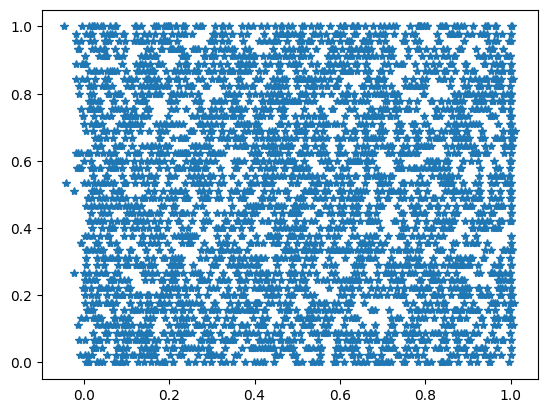

In [74]:
plt.plot(preds[:, 1], y_test[:,1], '*')